In [1]:
import scipy.stats as sps
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit 
#%matplotlib inline



In [2]:
solution_log = pd.read_csv("/Users/sinya/Desktop/CS центр/Практика Сириус/courses/88/solution_log.csv")
user_element_progress =  pd.read_csv("/Users/sinya/Desktop/CS центр/Практика Сириус/courses/88/user_element_progress.csv")
user_module_progress =  pd.read_csv("/Users/sinya/Desktop/CS центр/Практика Сириус/courses/88/user_module_progress.csv")
solution_log.head()

,id,tries_count,hints_used,score,submission_time,element_progress_id,verdict
0,16294651,2,0,0.0,2020-07-30 11:13:15.020928,55814514,wrong
1,16513703,6,0,0.0,2020-08-03 18:10:12.579412,55814514,wrong
2,16514164,8,0,0.0,2020-08-03 18:24:20.933115,55814514,wrong
3,16514152,7,0,0.0,2020-08-03 18:24:03.400469,55814514,wrong
4,16286431,1,0,0.0,2020-07-30 08:59:28.894212,55814514,wrong


In [3]:
# найдем учеников, решивших модуль самостоятельно, с наилучшим прогрессом
best = user_module_progress[user_module_progress['achieve_reason']=='solved']
best.groupby(by = 'user_id').sum()
best_id = best.sort_values(by = 'progress_current', ascending=False)['user_id'].head(1000).values


In [4]:

# объединим информацию о попытках решить элемент и о его прогрессе по элементам, что б привязать попытки к ученикам
df_merged = pd.merge(user_element_progress, solution_log,
                       how='left', left_on='id', right_on = 'element_progress_id')


In [5]:
# уберем немного лишнего
df_merged.pop('element_progress_id')
df_merged.pop('is_achieved')
df_merged.pop('module_progress_id')
df_merged.pop('course_id')
df_merged.pop('verdict')
df_merged.pop('score')
df_merged.pop('course_module_id')
df_merged

,id_x,user_id,course_element_type,course_element_id,progress_current,tries_count_x,time_created,time_updated,time_closed,time_achieved,time_started,achieve_reason,id_y,tries_count_y,hints_used,submission_time
0,24783857,100120070110754333,task,1961,1.0,17,2020-03-18 11:51:18.585281,2020-08-05 09:07:39.533539,2020-08-05 09:07:39.533539,2020-08-05 09:07:39.533539,NaN,solved,7079230.0,1.0,0.0,2020-03-25 09:37:49.314534
1,24783857,100120070110754333,task,1961,1.0,17,2020-03-18 11:51:18.585281,2020-08-05 09:07:39.533539,2020-08-05 09:07:39.533539,2020-08-05 09:07:39.533539,NaN,solved,7079244.0,2.0,0.0,2020-03-25 09:37:57.834537
2,24783857,100120070110754333,task,1961,1.0,17,2020-03-18 11:51:18.585281,2020-08-05 09:07:39.533539,2020-08-05 09:07:39.533539,2020-08-05 09:07:39.533539,NaN,solved,7315479.0,13.0,0.0,2020-03-27 14:19:35.200684
3,24783857,100120070110754333,task,1961,1.0,17,2020-03-18 11:51:18.585281,2020-08-05 09:07:39.533539,2020-08-05 09:07:39.533539,2020-08-05 09:07:39.533539,NaN,solved,7315423.0,8.0,0.0,2020-03-27 14:19:10.915280
4,24783857,100120070110754333,task,1961,1.0,17,2020-03-18 11:51:18.585281,2020-08-05 09:07:39.533539,2020-08-05 09:07:39.533539,2020-08-05 09:07:39.533539,NaN,solved,7315448.0,11.0,0.0,2020-03-27 14:19:21.221559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6782374,47533043,100119810111095810,task,2401,0.0,0,2020-05-14 09:30:11.798442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6782375,47533044,100119810111095810,task,1908,0.0,0,2020-05-14 09:30:11.798442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6782376,47533045,100119810111095810,text,84,0.0,0,2020-05-14 09:30:11.798442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6782377,47533046,100119810111095810,task,2402,0.0,0,2020-05-14 09:30:11.798442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


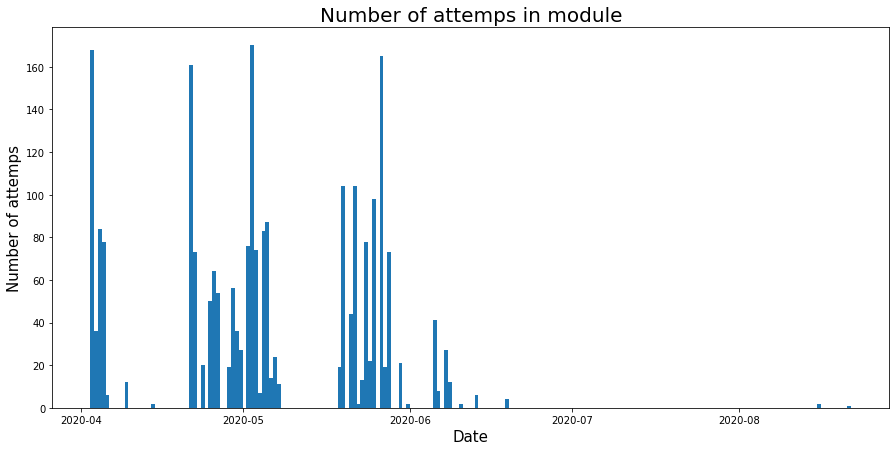

2361


In [6]:
import datetime

# построим гистограмму временных отметок попыток. 
# пока выбираем пользователя руками, selected_id от 0 до 39
selected_id = 0

example_user = df_merged[df_merged['user_id']==best_id[selected_id]]
example_user = example_user[example_user['course_element_type']=='task']
example_user['submission_time'] = pd.to_datetime(example_user['submission_time'])

plt.figure(figsize=[15, 7])
plt.title('Number of attemps in module', fontsize=20)
plt.ylabel('Number of attemps', fontsize=15)
plt.xlabel('Date', fontsize=15)

plt.hist(example_user['submission_time'].values, bins=200)
plt.show()

#сколько всего было попыток на модуль
print(len(example_user['submission_time'].values))

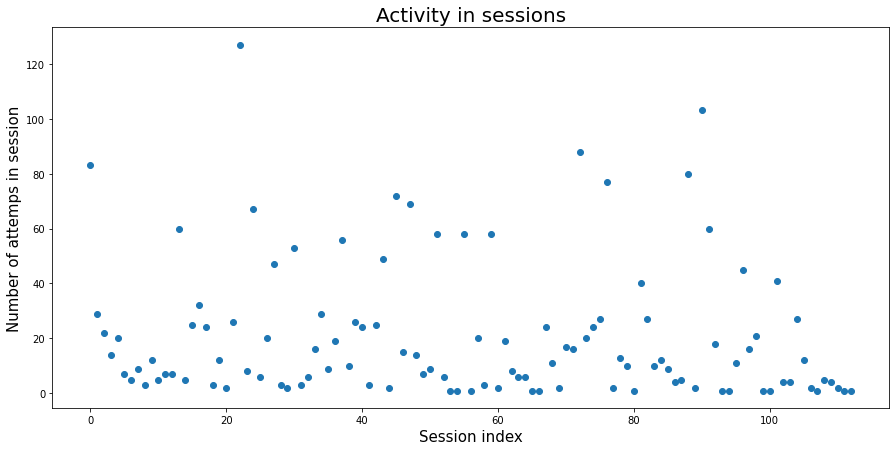

2360


In [7]:

sessions = []
cur_session = []
prev_date = example_user['submission_time'].values[0]
example_user = example_user.sort_values(by = 'submission_time')

# разбиваем на сессии, считаем что попытки внутри сессии разделены интервалами не более 40 минут
for cur_date in example_user['submission_time'].values:
    if (cur_date - prev_date < np.timedelta64(40, 'm')):
        cur_session.append(cur_date)
    else: 
        sessions.append(cur_session)
        cur_session = [cur_date]
    prev_date = cur_date
    
# теперь в sessions  у нас хранятся списки временных отметок по сессиям

plt.figure(figsize=[15, 7])
plt.title('Activity in sessions', fontsize=20)
plt.ylabel('Number of attemps in session', fontsize=15)
plt.xlabel('Session index', fontsize=15)
plt.plot([i for i in range(len(sessions))],[len(session) for session in sessions],'o' )
plt.show()

#сколько всего было попыток на модуль. Должно сходится с предыдущем, а не сходится
print(sum([len(session) for session in sessions]))

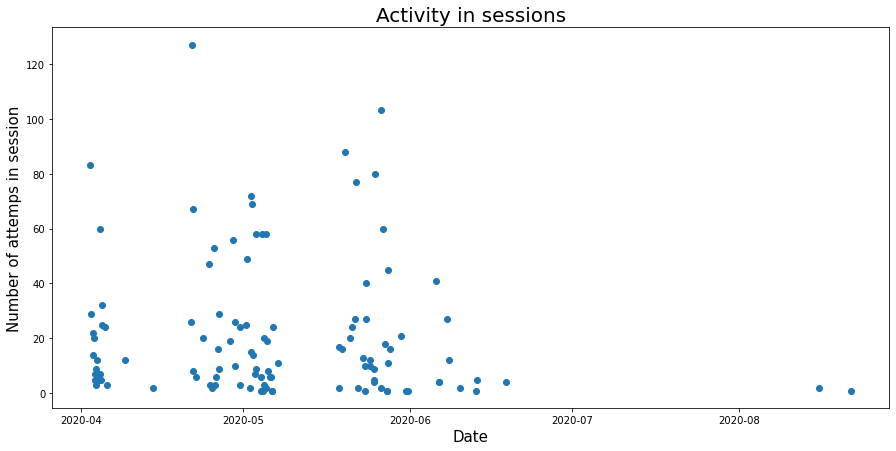

In [8]:

plt.figure(figsize=[15, 7])
plt.title('Activity in sessions', fontsize=20)
plt.ylabel('Number of attemps in session', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.plot([sessions[i][0] for i in range(len(sessions))],[len(session) for session in sessions],'o' )
plt.show()

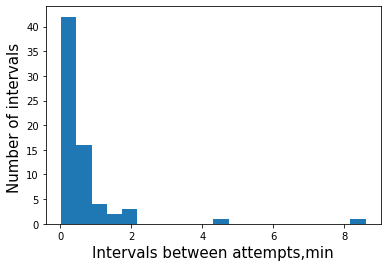

In [29]:
# посмотрим как разнесены попытки
# рассчитываем увидеть два и больше кластера - маленькие времена внутри сессии и большие - между


selected_id = 1

example_user = df_merged[df_merged['user_id']==best_id[selected_id]]
example_user = example_user[example_user['course_element_type']=='task']
example_user['submission_time'] = pd.to_datetime(example_user['submission_time'])
example_user = example_user.sort_values(by = 'submission_time')

prev_date = example_user['submission_time'].values[0]
delays = []


for cur_date in example_user['submission_time'].values[1:]:
    if (cur_date - prev_date < np.timedelta64(24, 'h')):
        delays.append((cur_date - prev_date)/ np.timedelta64(1, 'm'))
        prev_date = cur_date

plt.hist(delays, bins = 20)
plt.xlabel('Intervals between attempts,min', fontsize=15)
plt.ylabel('Number of intervals ', fontsize=15)
plt.show()


In [5]:
# построим гистограму 0.75 квантилей интервалов между попытками для всех пользователей

quant = []

for selected_id in range(1000):

    example_user = df_merged[df_merged['user_id']==best_id[selected_id]]
    example_user = example_user[example_user['course_element_type']=='task']
    example_user['submission_time'] = pd.to_datetime(example_user['submission_time'])
    example_user = example_user.sort_values(by = 'submission_time')

    prev_date = example_user['submission_time'].values[0]
    delays = []


    for cur_date in example_user['submission_time'].values[1:]:
        if (cur_date - prev_date < np.timedelta64(24, 'h')):
            delays.append((cur_date - prev_date)/ np.timedelta64(1, 'm'))
            prev_date = cur_date
    if delays != []:    
        quant.append(np.quantile(delays,0.95))



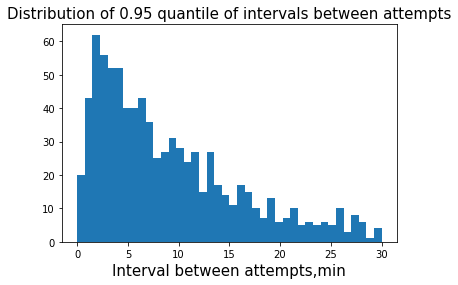

In [11]:
plt.hist(quant, bins = 40, range = (0,30))
plt.title('Distribution of 0.95 quantile of intervals between attempts', fontsize=15)
plt.xlabel('Interval between attempts,min', fontsize=15)
plt.show()

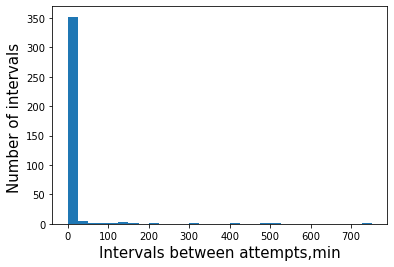

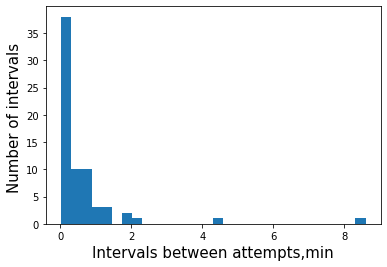

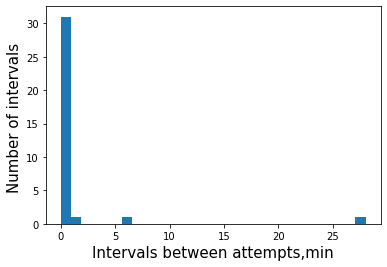

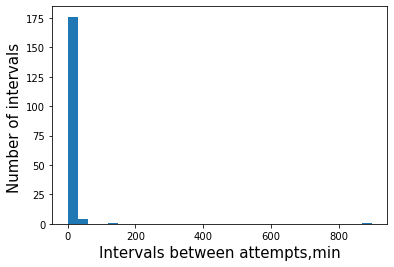

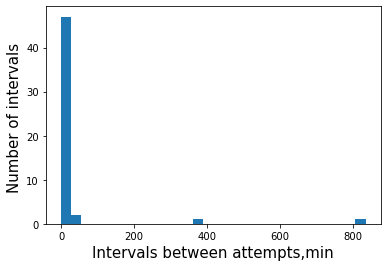

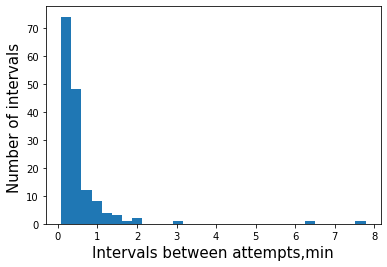

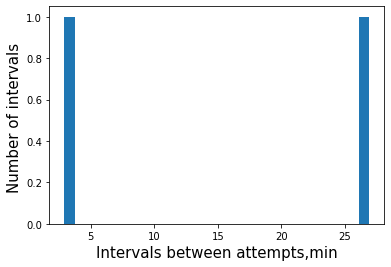

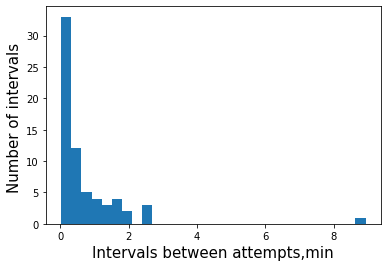

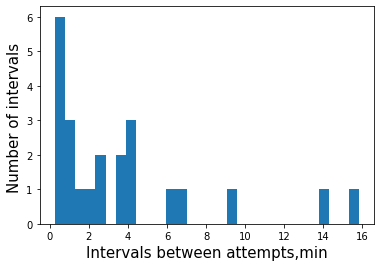

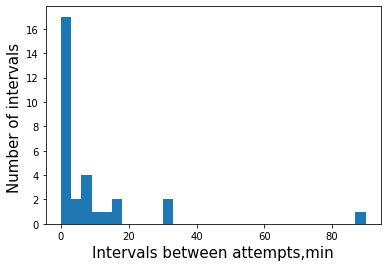

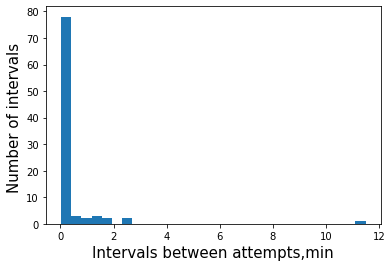

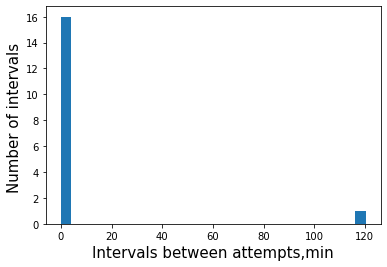

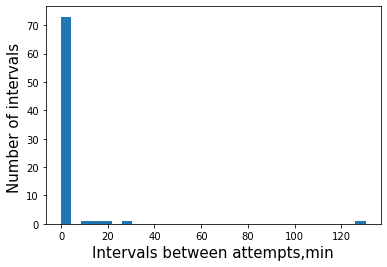

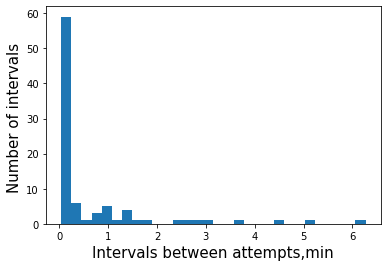

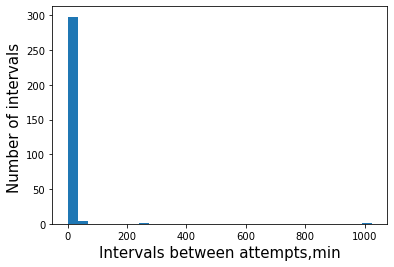

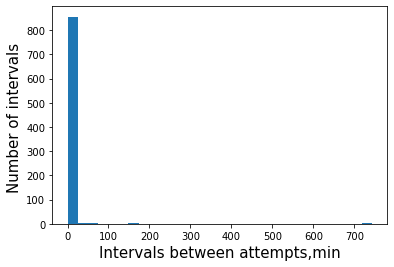

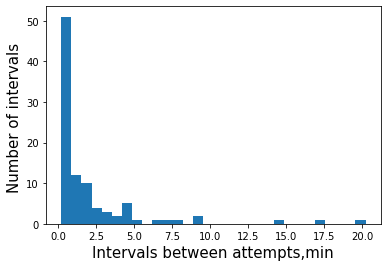

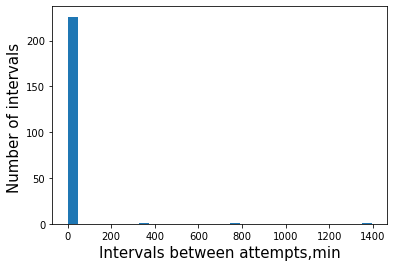

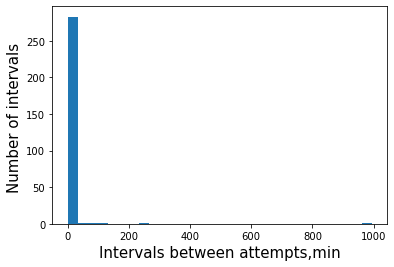

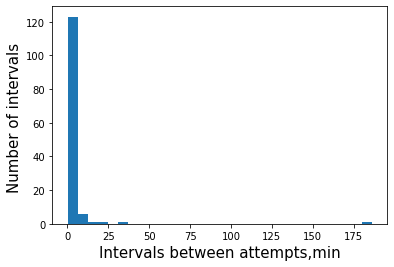

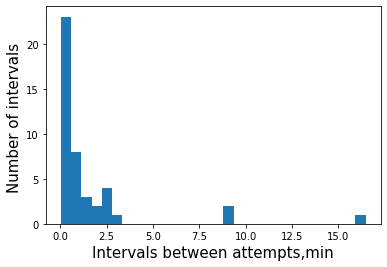

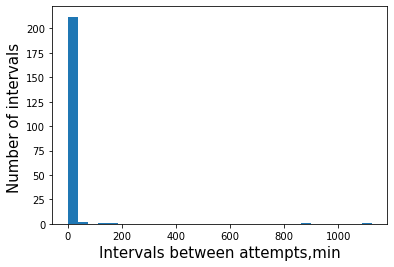

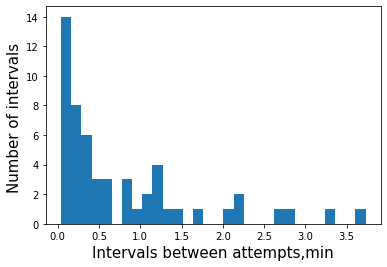

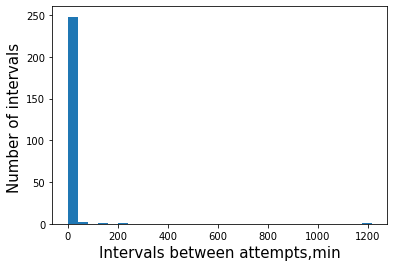

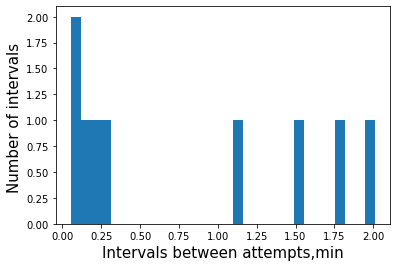

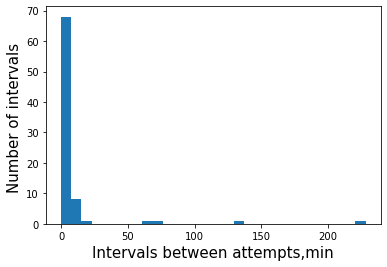

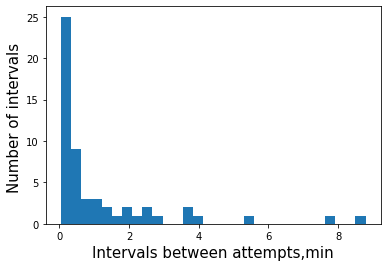

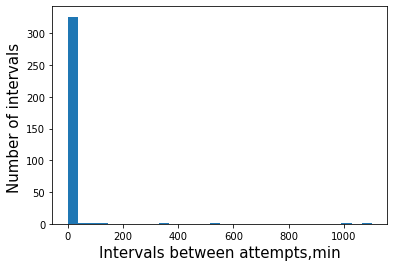

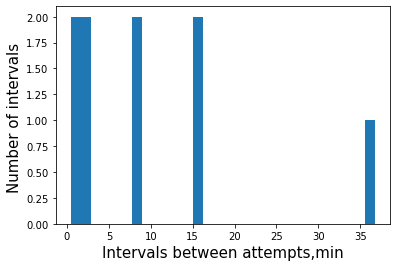

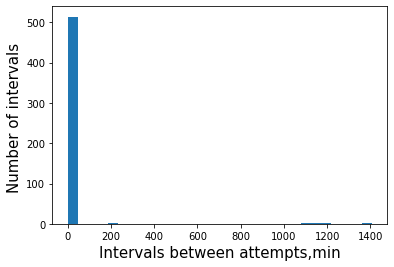

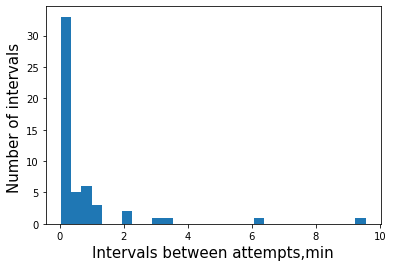

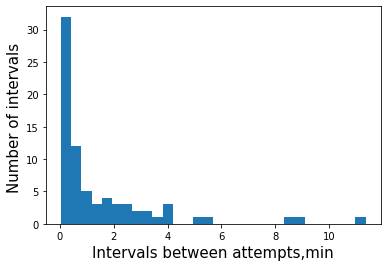

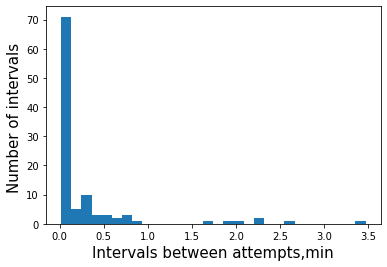

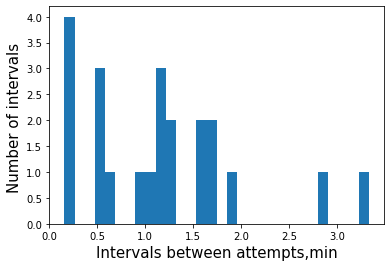

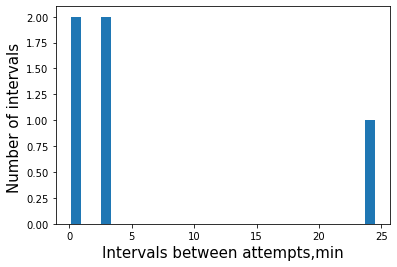

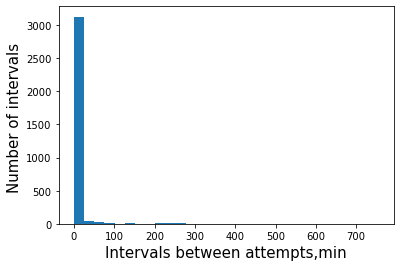

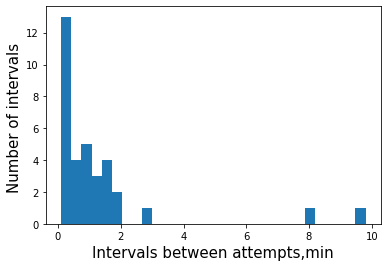

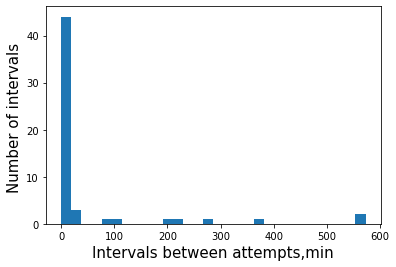

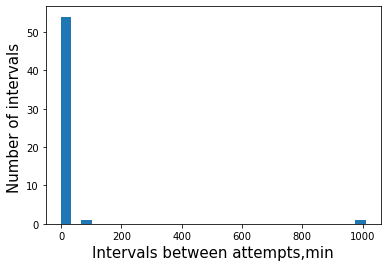

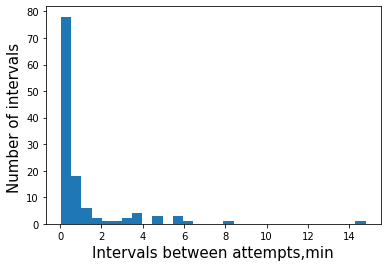

In [20]:
# посмотрим как разнесены попытки
# рассчитываем увидеть два и больше кластера - маленькие времена внутри сессии и большие - между


for selected_id in range(40):

    example_user = df_merged[df_merged['user_id']==best_id[selected_id]]
    example_user = example_user[example_user['course_element_type']=='task']
    example_user['submission_time'] = pd.to_datetime(example_user['submission_time'])
    example_user = example_user.sort_values(by = 'submission_time')

    prev_date = example_user['submission_time'].values[0]
    delays = []


    for cur_date in example_user['submission_time'].values[1:]:
        if (cur_date - prev_date < np.timedelta64(24, 'h')):
            delays.append((cur_date - prev_date)/ np.timedelta64(1, 'm'))
            prev_date = cur_date
    
    plt.hist(delays, bins = 30)
    plt.xlabel('Intervals between attempts,min', fontsize=15)
    plt.ylabel('Number of intervals ', fontsize=15)
    plt.show()


# красная точка - удвоенный центр масс промежутка между попытками



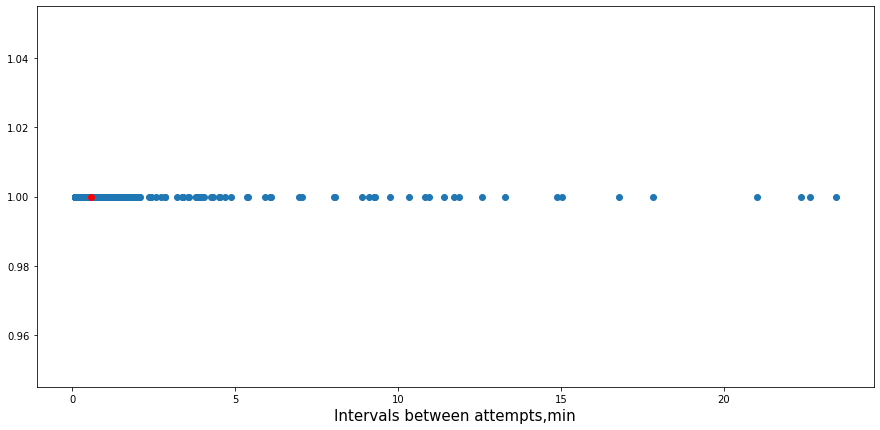

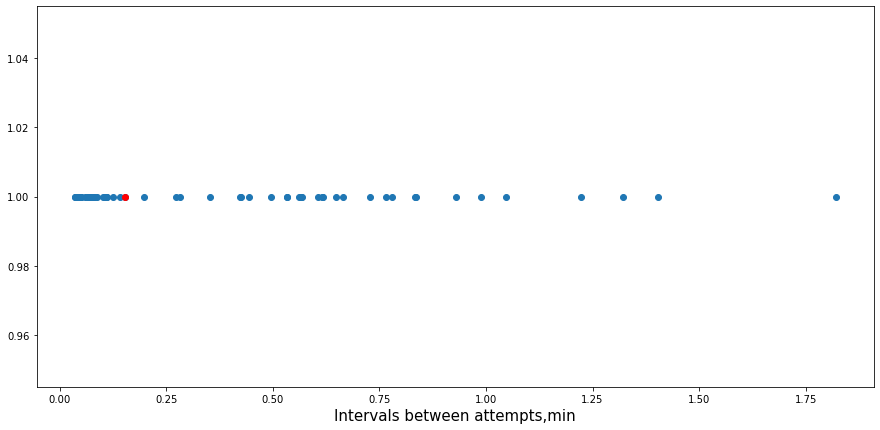

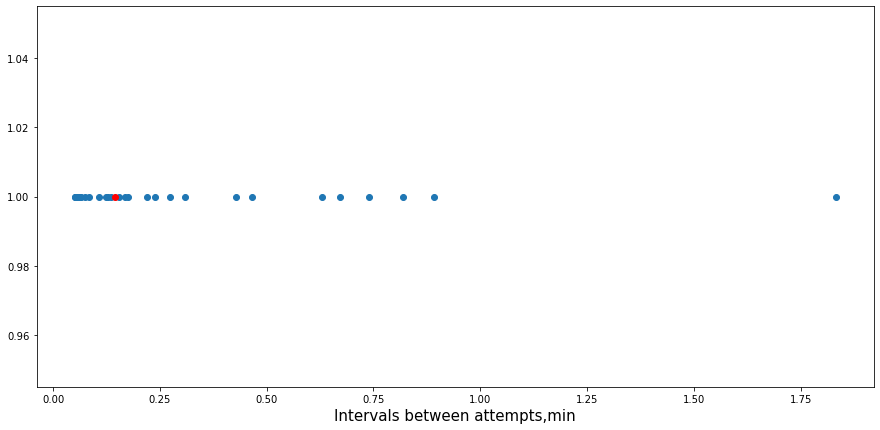

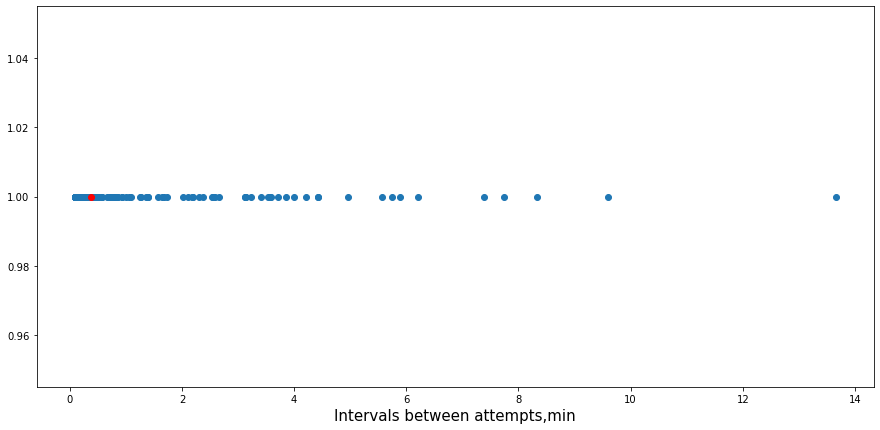

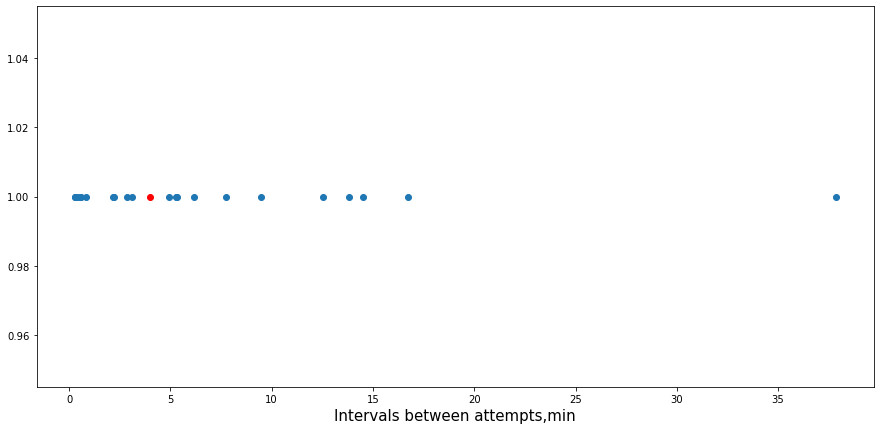

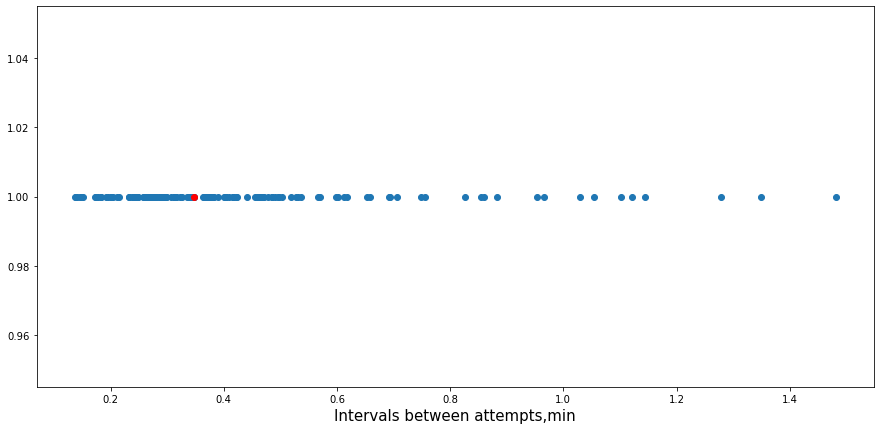

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


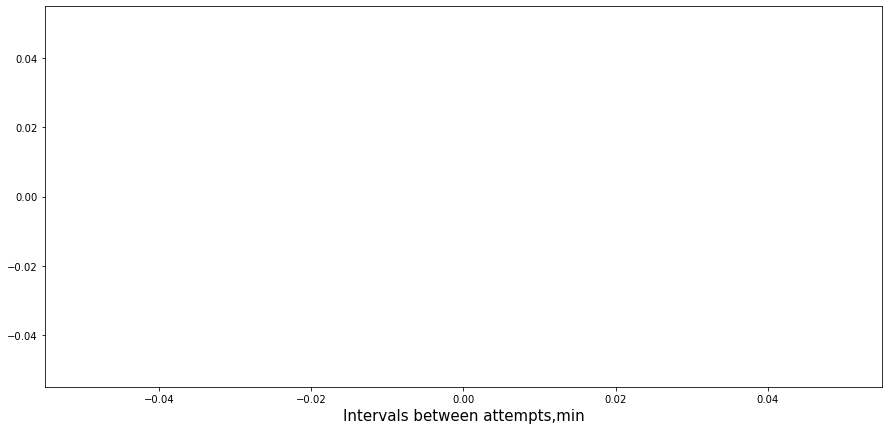

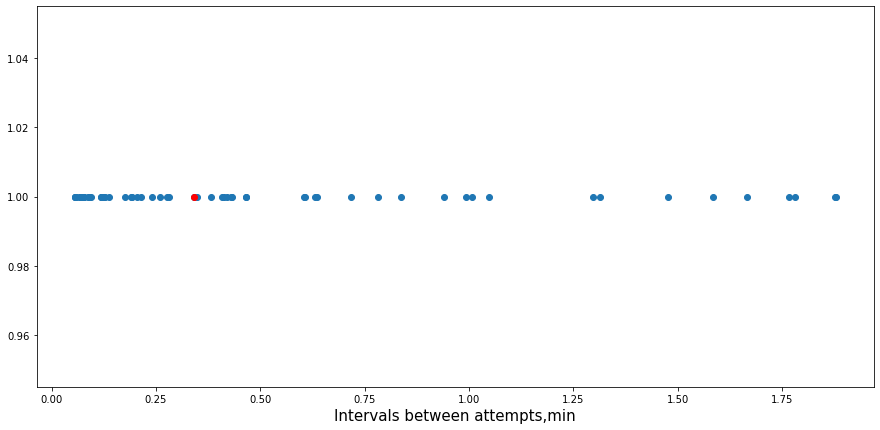

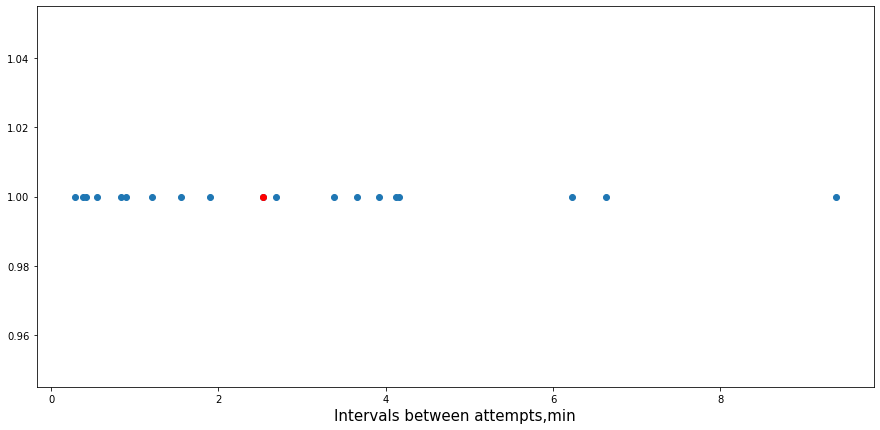

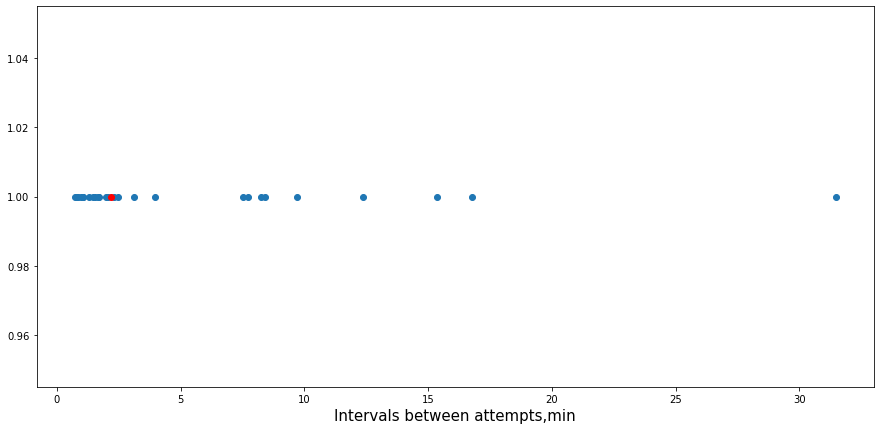

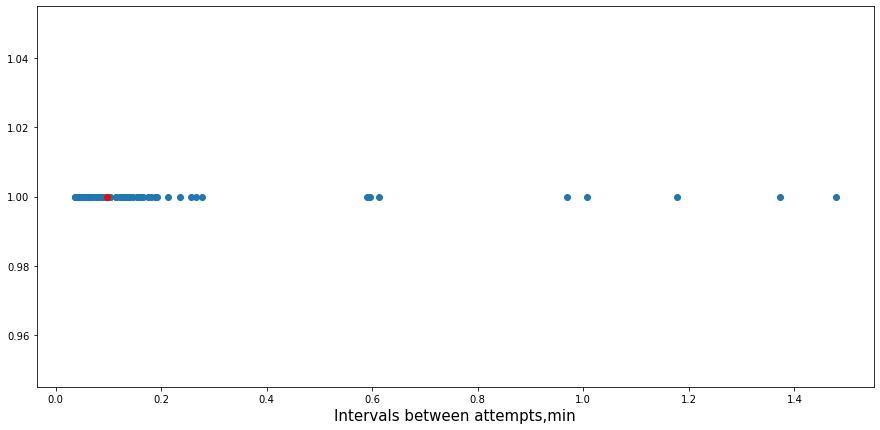

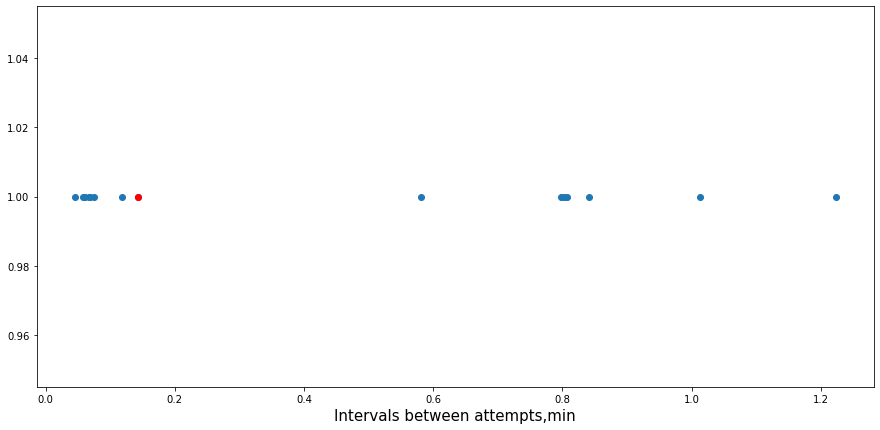

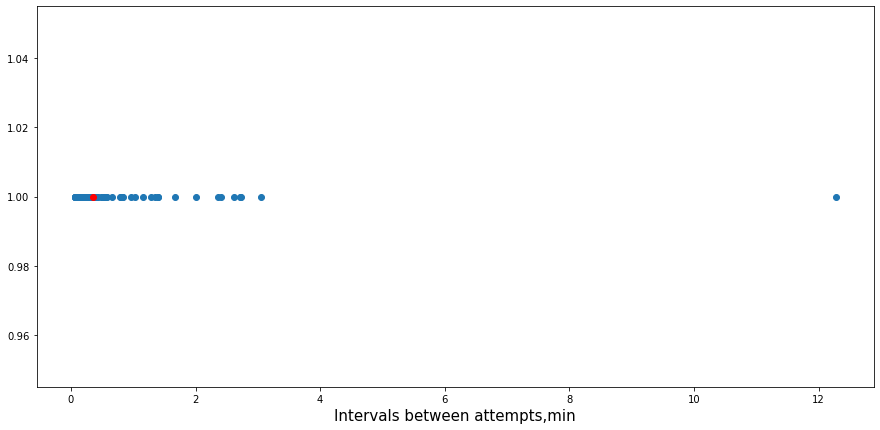

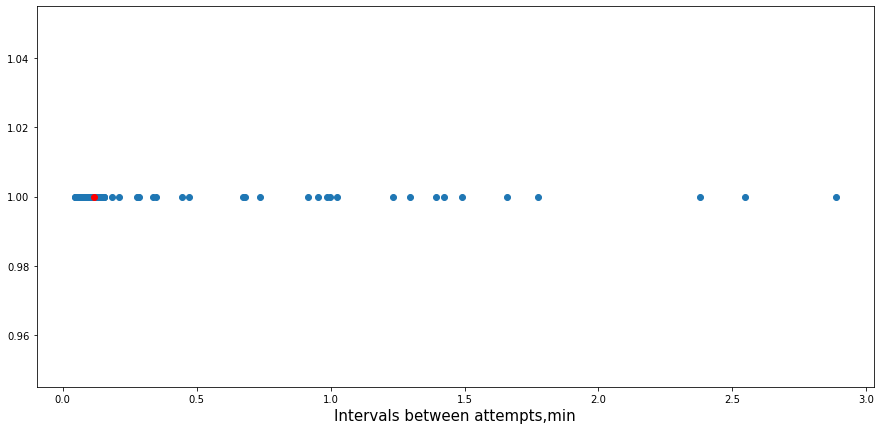

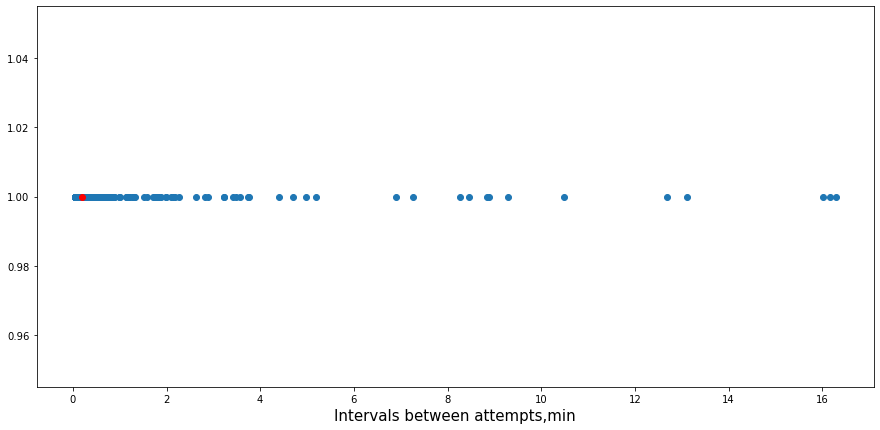

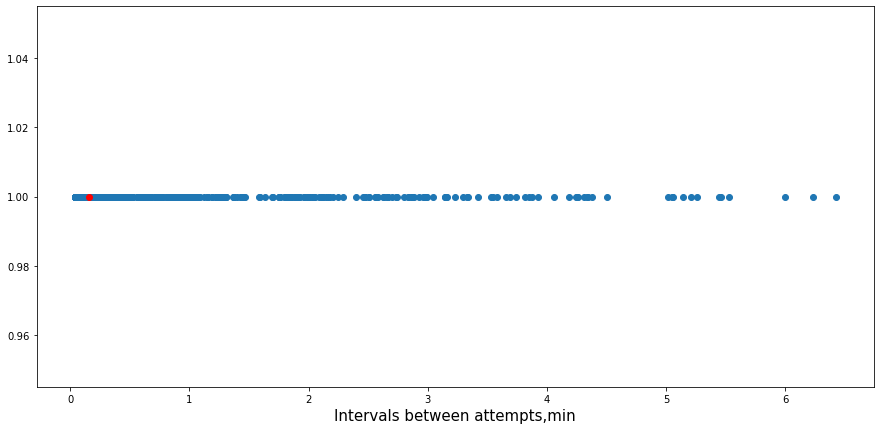

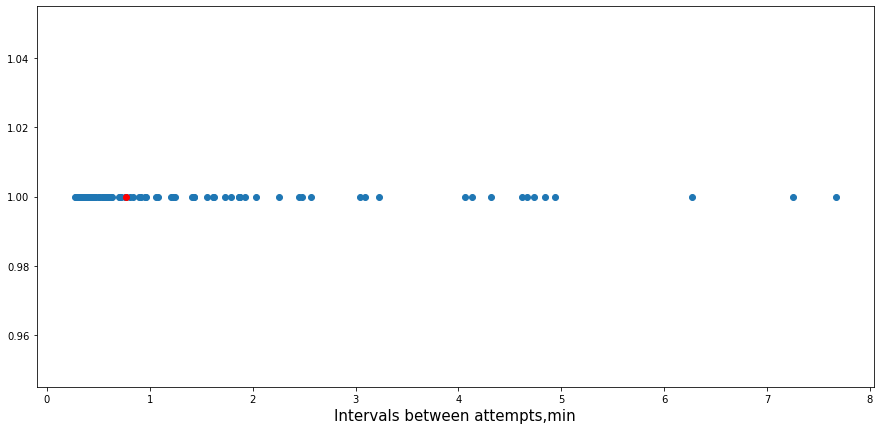

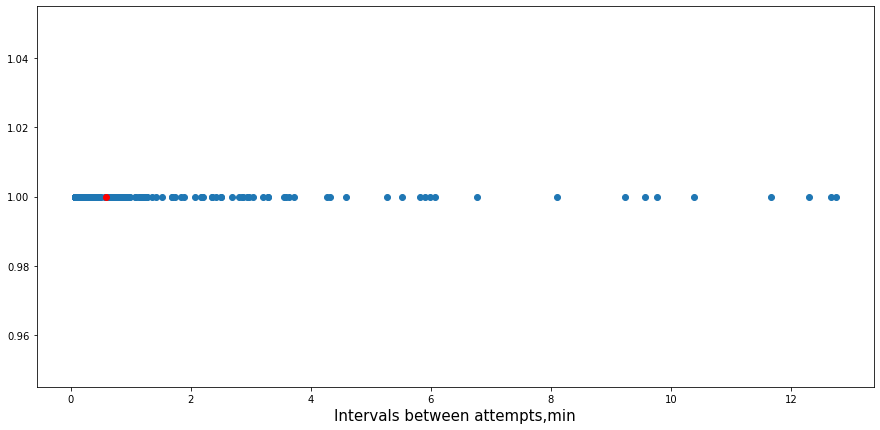

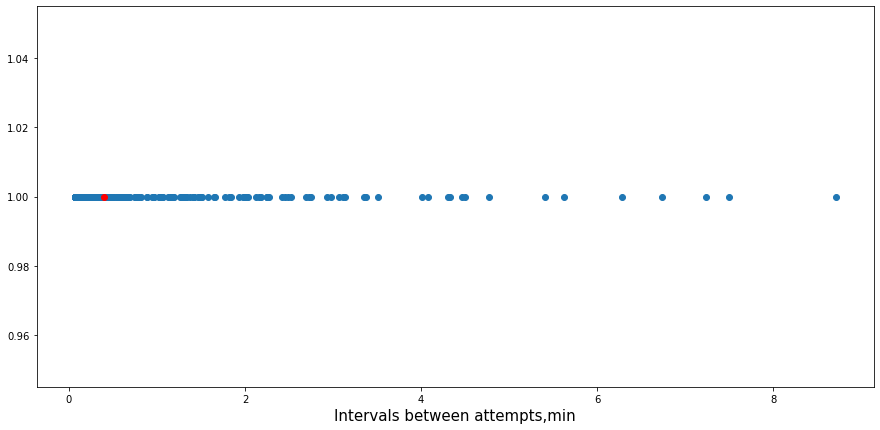

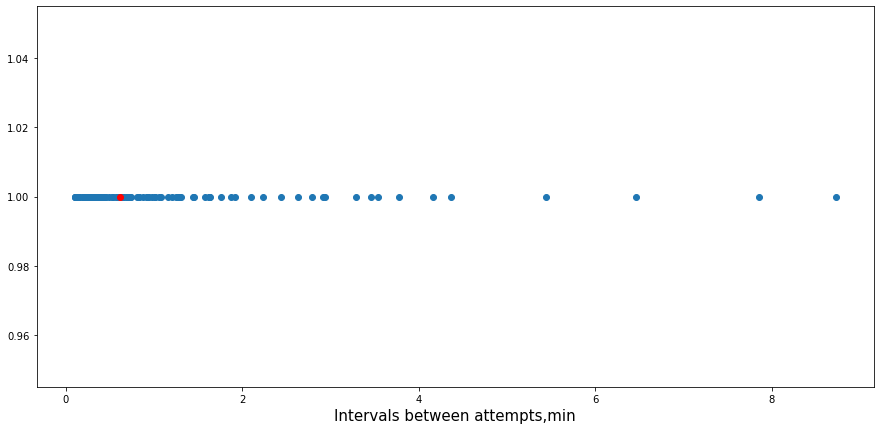

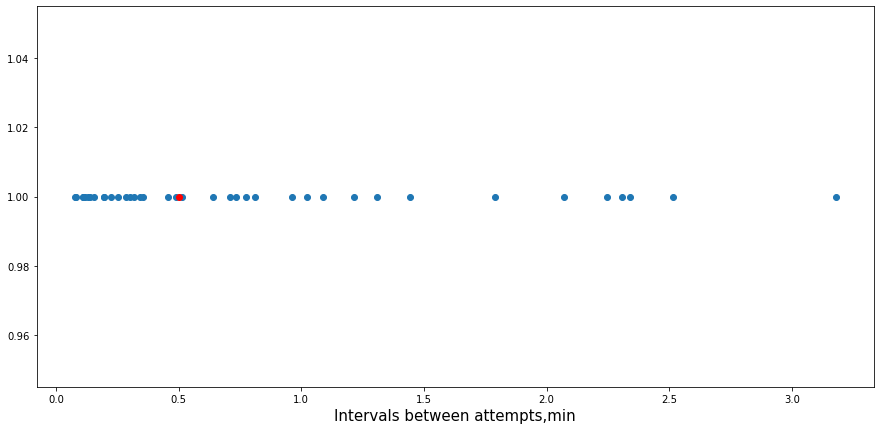

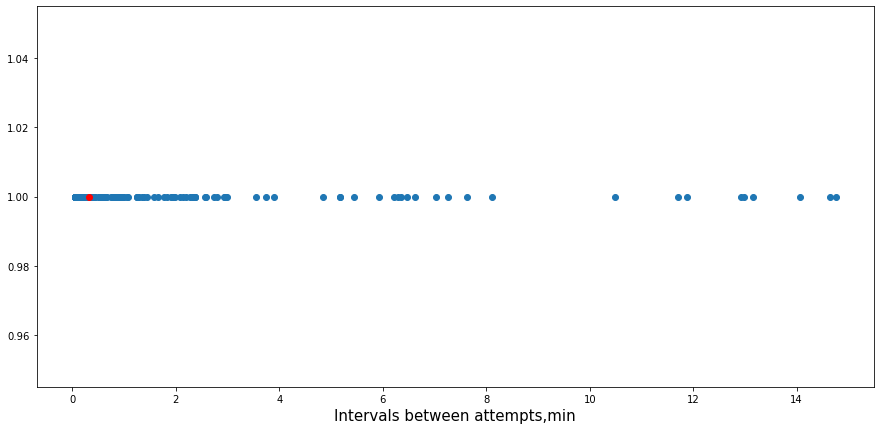

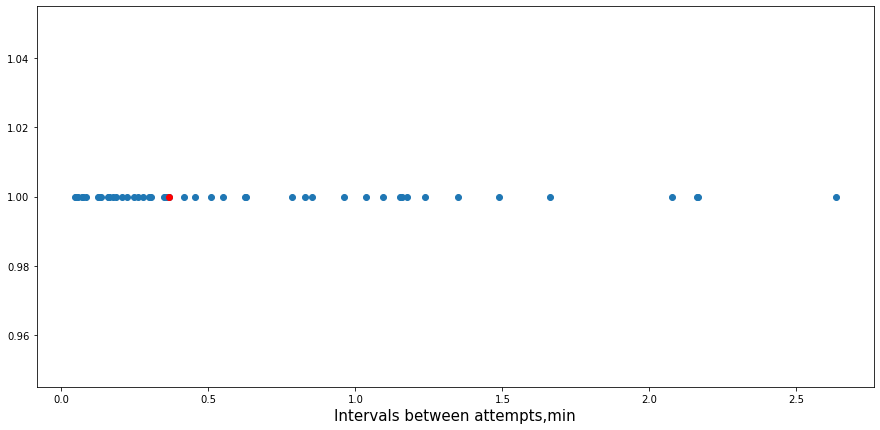

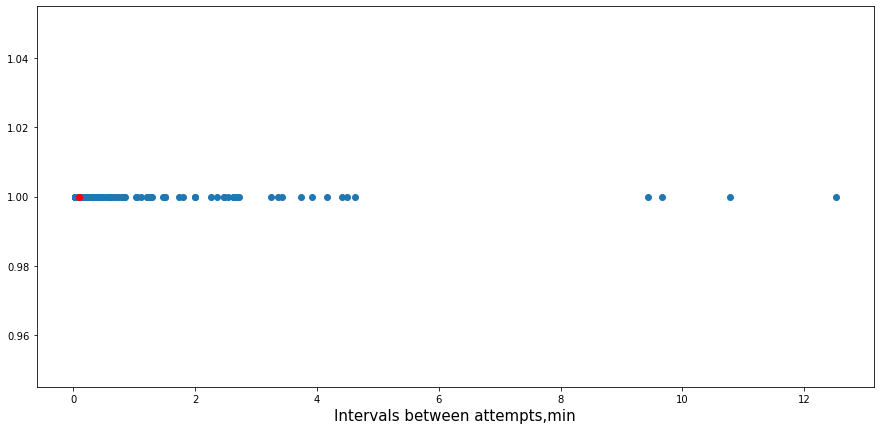

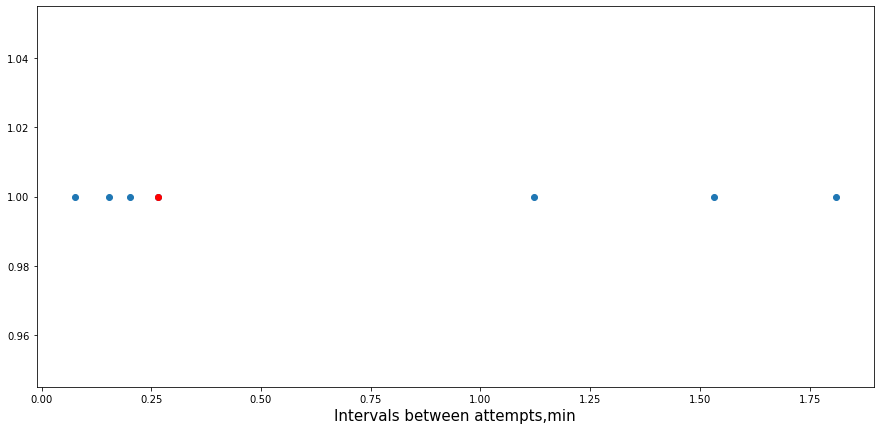

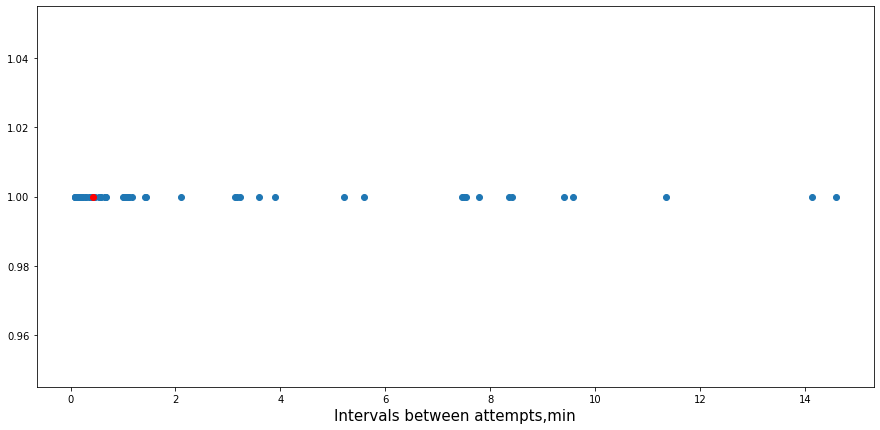

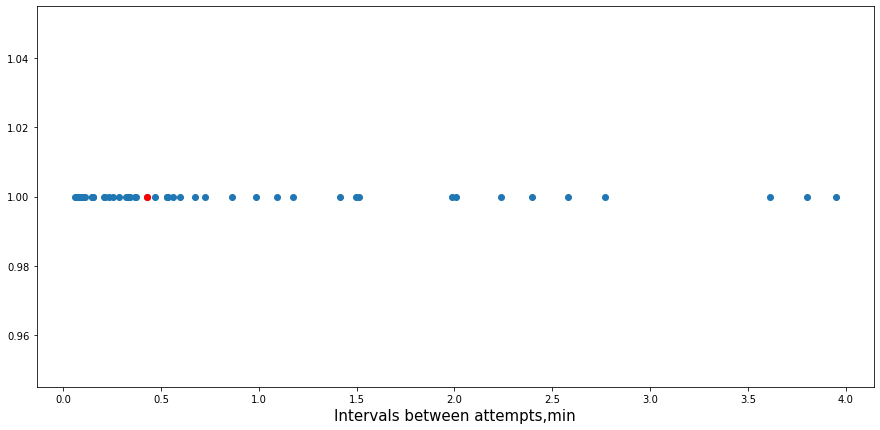

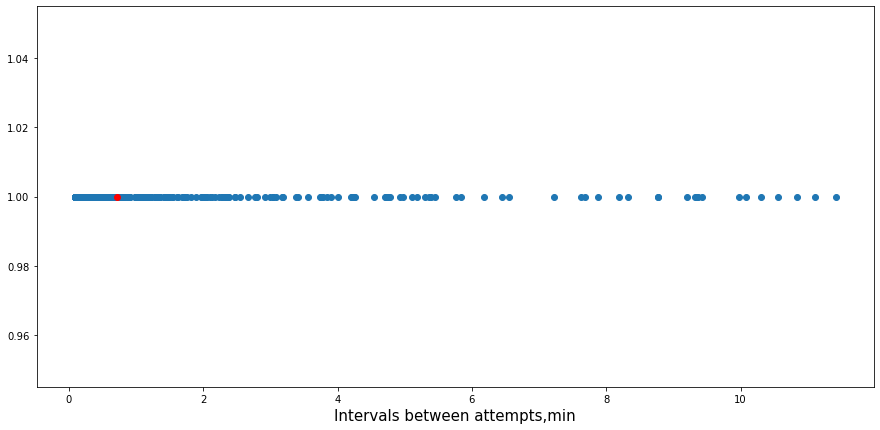

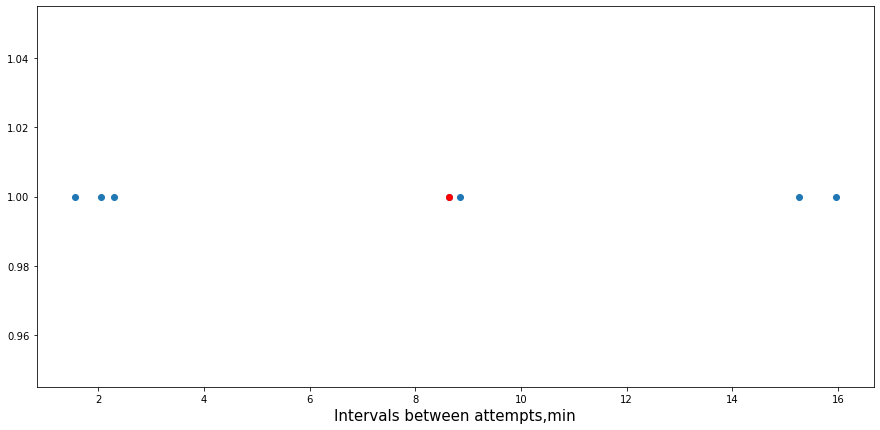

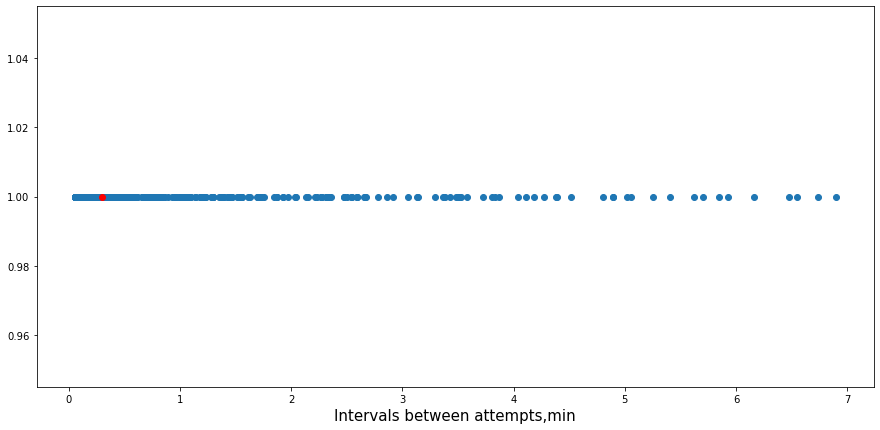

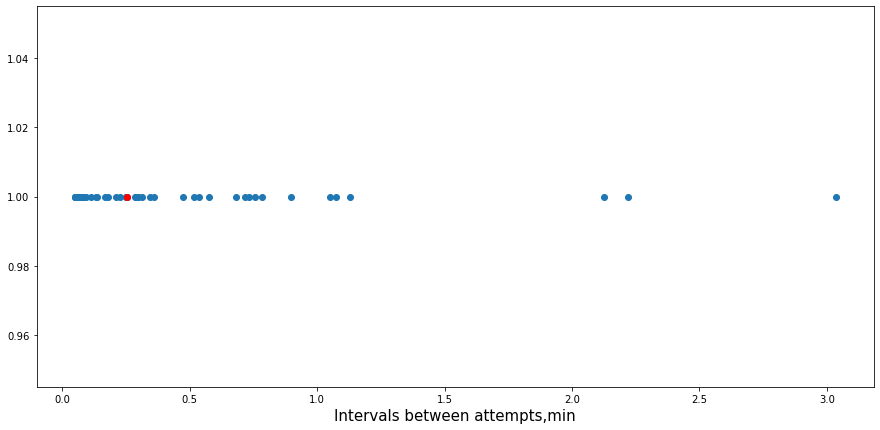

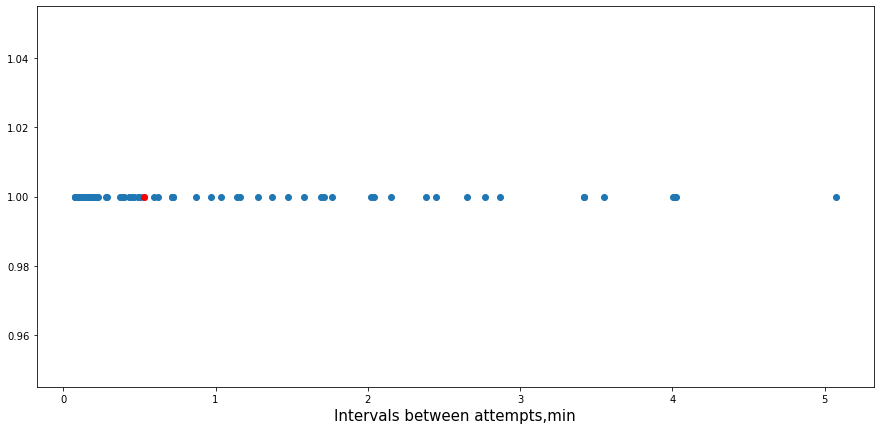

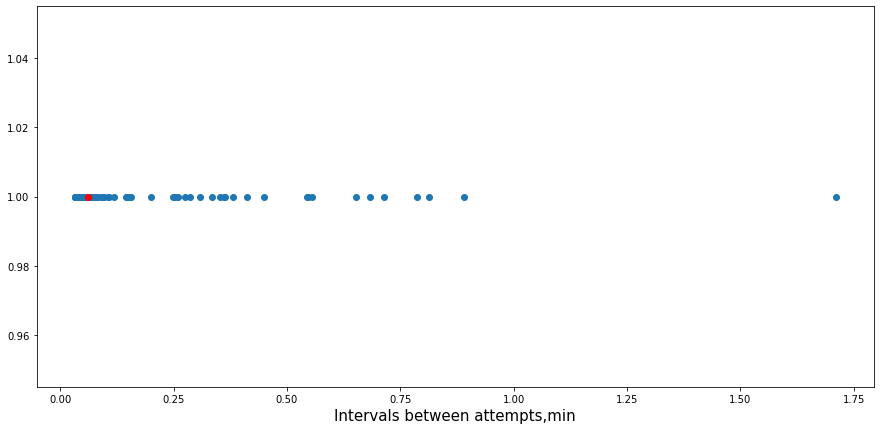

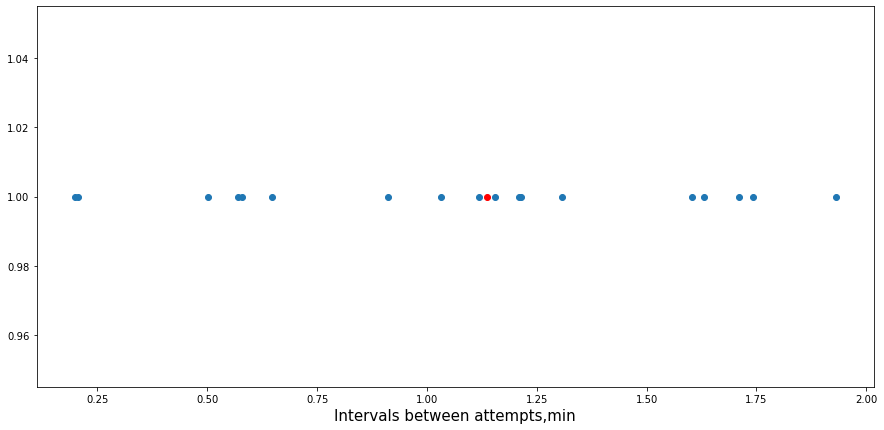

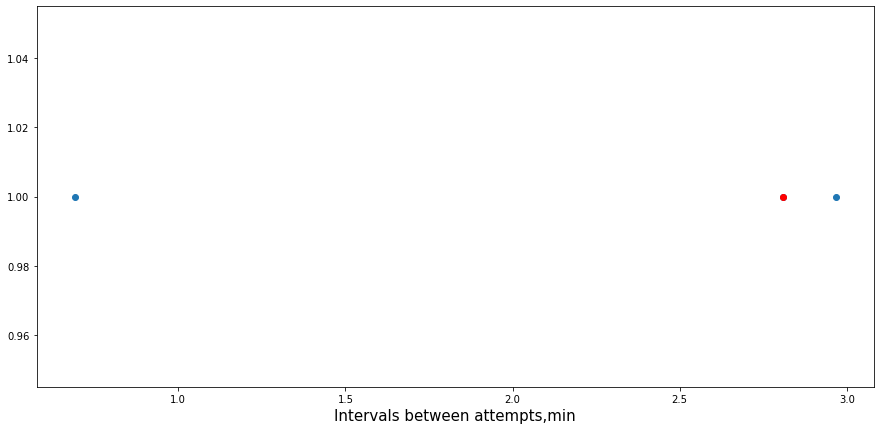

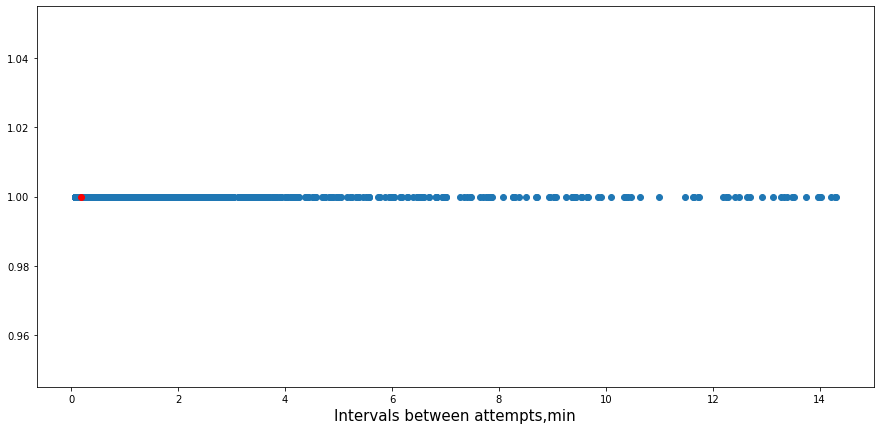

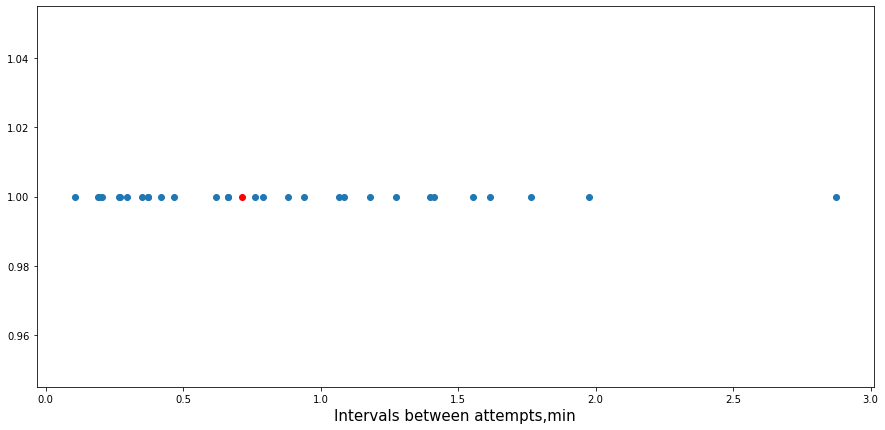

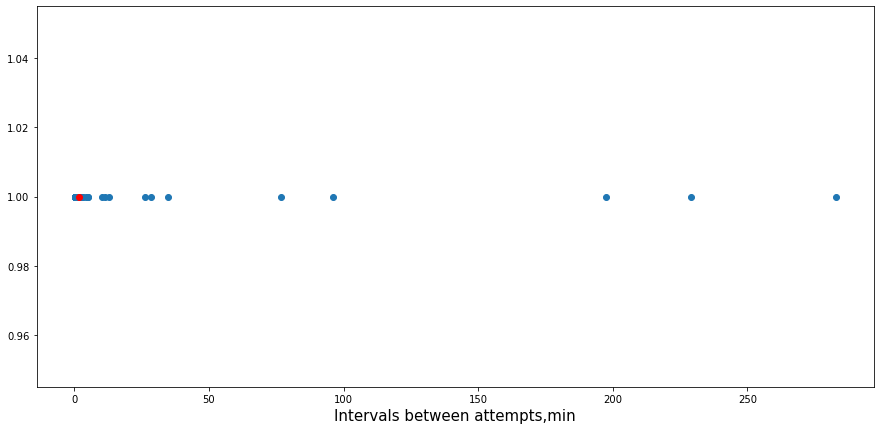

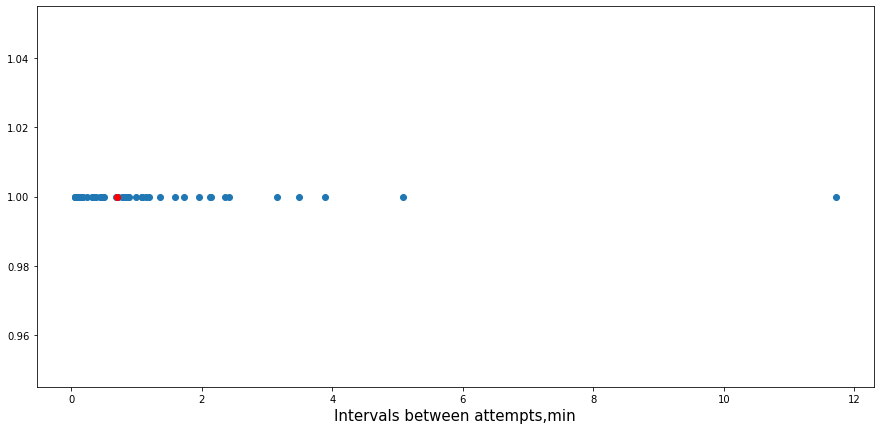

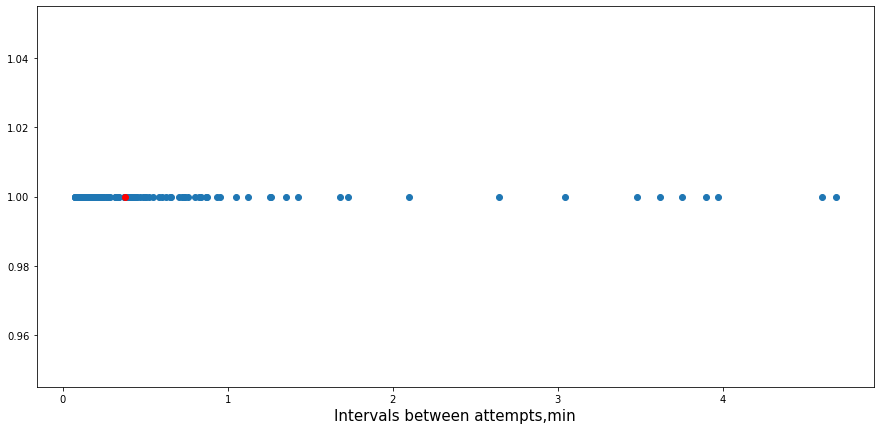

In [7]:
# посмотрим как разнесены попытки
# рассчитываем увидеть два и больше кластера - маленькие времена внутри сессии и большие - между


for selected_id in range(40):

    example_user = df_merged[df_merged['user_id']==best_id[selected_id]]
    example_user = example_user[example_user['course_element_type']=='task']
    example_user['submission_time'] = pd.to_datetime(example_user['submission_time'])
    example_user = example_user.sort_values(by = 'submission_time')

    prev_date = example_user['submission_time'].values[0]
    delays = []


    for cur_date in example_user['submission_time'].values[1:]:
        if (cur_date - prev_date < np.timedelta64(24, 'h')):
            delays.append((cur_date - prev_date)/ np.timedelta64(1, 'm'))
            prev_date = cur_date
    
    l,r = np.quantile(delays, [0.05,0.95])
    cutted_delays = [i for i in delays if i>l and i<r]
                
    plt.figure(figsize=[15, 7])
    plt.xlabel('Intervals between attempts,min', fontsize=15)
    plt.plot(cutted_delays, np.ones((len(cutted_delays)), dtype=int),'o' )
    plt.plot(np.median(cutted_delays), 1,'o' ,color = 'r')
    plt.show()
# красная точка - удвоенный центр масс промежутка между попытками


In [5]:
# попробуем сравнить число сессий первым и вторым образом найденное
selected_id = 1

def split_session(selected_id = 1, interval = np.timedelta64(40, 'm'), data =  df_merged, best = best_id ):
    
    example_user = data[data['user_id']==best[selected_id]]
    example_user = example_user[example_user['course_element_type']=='task']
    example_user['submission_time'] = pd.to_datetime(example_user['submission_time'])
    example_user = example_user.sort_values(by = 'submission_time')
    
    sessions = []
    cur_session = [example_user['submission_time'].values[0]]
    prev_date = example_user['submission_time'].values[0]

    for cur_date in example_user['submission_time'].values[1:]:
        if (cur_date - prev_date < interval):
            cur_session.append(cur_date)
        else: 
            sessions.append(cur_session)
            cur_session = [cur_date]
        prev_date = cur_date
        
    sessions.append(cur_session)
    return sessions   # теперь в sessions  у нас хранятся списки временных отметок по сессиям

def find_interval(selected_id = 1, data =  df_merged, best = best_id):
    example_user = data[data['user_id']==best[selected_id]]
    example_user = example_user[example_user['course_element_type']=='task']
    example_user['submission_time'] = pd.to_datetime(example_user['submission_time'])
    example_user = example_user.sort_values(by = 'submission_time')
    prev_date = example_user['submission_time'].values[0]
    delays = []

    for cur_date in example_user['submission_time'].values[1:]:
        if (cur_date - prev_date < np.timedelta64(24, 'h')):
            delays.append((cur_date - prev_date))
            prev_date = cur_date
    return 2*np.mean(delays)
    
for i in range(40):
    print(i,len(split_session(selected_id = i)),len(split_session(selected_id = i,interval = find_interval(selected_id = i))))
    
# видим что сильно расходится на многих пользователях    

0 114 135
1 75 477
2 165 233
3 20 33
4 48 43
5 206 219
6 103 107
7 9 99
8 84 121
9 78 116
10 72 711
11 218 222
12 66 133
13 192 333
14 174 219
15 216 227
16 4 25
17 19 21
18 14 26
19 27 131
20 15 99
21 48 53
22 234 260
23 34 76
24 11 67
25 209 216
26 87 467
27 16 17
28 81 100
29 24 26
30 205 249
31 181 274
32 7 106
33 5 25
34 237 252
35 109 198
36 235 257
37 248 241
38 80 80
39 4 29


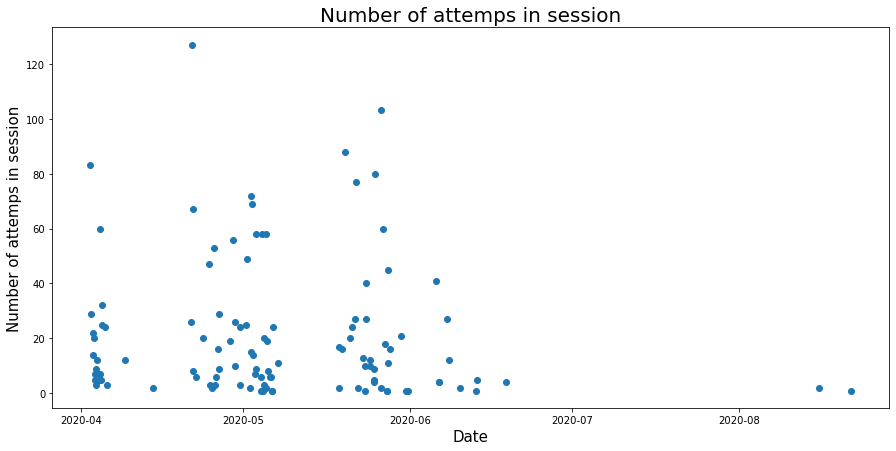

In [18]:
# метрика активности № 1: число посылок за сессию
student = 0

sessions = split_session(selected_id = student)

plt.figure(figsize=[15, 7])
plt.title('Number of attemps in session', fontsize=20)
plt.ylabel('Number of attemps in session', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.plot([sessions[i][0] for i in range(len(sessions))],[len(session) for session in sessions],'o' )
plt.show()



/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


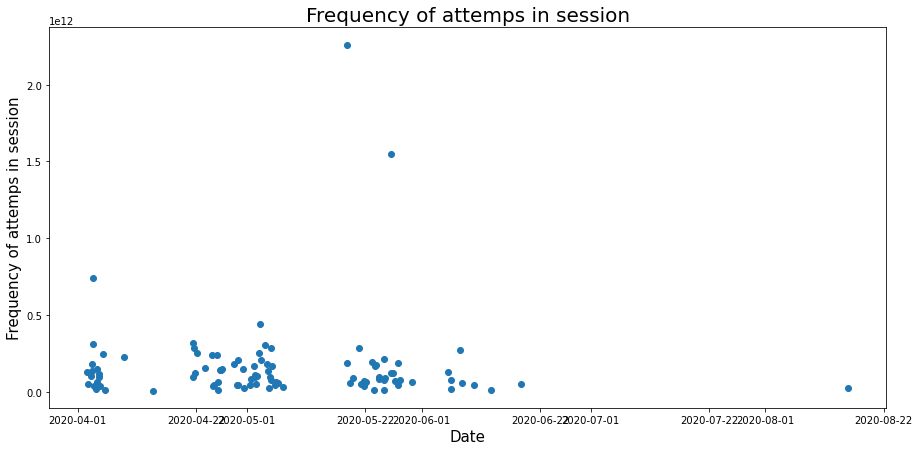

In [19]:
# метрика активности № 2: частота посылок в сессии
def interval_frequency(cur_session):
    delays = []
    prev_date = cur_session[0]
    for cur_date in cur_session[1:]:
        delays.append((cur_date - prev_date))
        prev_date = cur_date
    return np.mean(delays)
    
plt.figure(figsize=[15, 7])
plt.title('Frequency of attemps in session', fontsize=20)
plt.ylabel('Frequency of attemps in session', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.plot([sessions[i][0] for i in range(len(sessions))],[interval_frequency(session) for session in sessions],'o' )
plt.show()

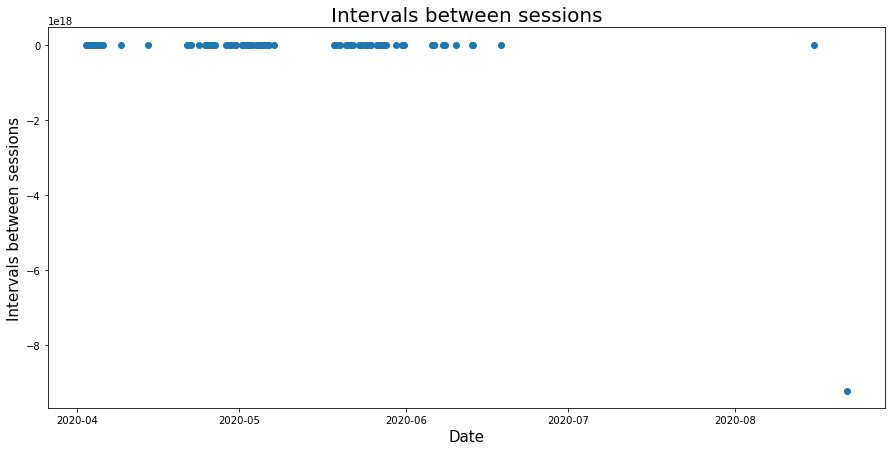

In [20]:
# метрика активности № 3: интервалы между сессиями

def interval_count(sessions):
    intervals = []
    end_prev = sessions[0][-1]
    for cur_session in sessions[1:]:
        start_cur = cur_session[0]
        intervals.append(start_cur - end_prev)
        end_prev = cur_session[-1]
    return intervals
    
    
plt.figure(figsize=[15, 7])
plt.title('Intervals between sessions', fontsize=20)
plt.ylabel('Intervals between sessions', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.plot([sessions[i][0] for i in range(len(sessions)-1)],interval_count(sessions) ,'o' )
plt.show()

In [21]:
# метрика активности № 4: продолжительность сессии

In [22]:
def interval_count(sessions):
    intervals = []
    end_prev = sessions[0][-1]
    for cur_session in sessions[1:]:
        start_cur = cur_session[0]
        intervals.append(start_cur - end_prev)
        end_prev = cur_session[-1]
    return intervals
a =  [[1,2,3],[5,6],[20,21]]   
b = [1,2,3,5,6,20,21]
interval_count(a)

[2, 14]

In [136]:
def split_session( example_user = b, interval = 1 ):
    
    sessions = []
    cur_session = [example_user[0]]
    prev_date = example_user[0]

    for cur_date in example_user[1:]:
        print(prev_date,cur_date)
        if (cur_date - prev_date <= interval):
            cur_session.append(cur_date)
        else: 
            sessions.append(cur_session)
            cur_session = [cur_date]
        prev_date = cur_date
    sessions.append(cur_session)
    return sessions   # теперь в sessions  у нас хранятся списки временных отметок по сессиям

interval_count(split_session())



1 2
2 3
3 5
5 6
6 20
20 21


[2, 14]

In [145]:
example_user = df_merged[df_merged['user_id']==best_id[selected_id]]
example_user = example_user[example_user['course_element_type']=='task']
example_user['submission_time'] = pd.to_datetime(example_user['submission_time'])
example_user = example_user.sort_values(by = 'submission_time')

example_user

,id_x,user_id,course_element_type,course_element_id,progress_current,tries_count_x,time_created,time_updated,time_closed,time_achieved,time_started,achieve_reason,id_y,tries_count_y,hints_used,submission_time
478637,53657957,100120050111139867,task,1553,1.0,18,2020-06-26 12:46:19.588916,2020-06-26 13:02:48.379411,2020-06-26 13:02:48.379411,2020-06-26 13:02:48.379411,NaN,solved,14988561.0,1.0,0.0,2020-06-26 12:58:18.406924
478638,53657957,100120050111139867,task,1553,1.0,18,2020-06-26 12:46:19.588916,2020-06-26 13:02:48.379411,2020-06-26 13:02:48.379411,2020-06-26 13:02:48.379411,NaN,solved,14988567.0,2.0,0.0,2020-06-26 12:58:22.638290
478636,53657957,100120050111139867,task,1553,1.0,18,2020-06-26 12:46:19.588916,2020-06-26 13:02:48.379411,2020-06-26 13:02:48.379411,2020-06-26 13:02:48.379411,NaN,solved,14988573.0,3.0,0.0,2020-06-26 12:58:25.698719
478650,53657957,100120050111139867,task,1553,1.0,18,2020-06-26 12:46:19.588916,2020-06-26 13:02:48.379411,2020-06-26 13:02:48.379411,2020-06-26 13:02:48.379411,NaN,solved,14988606.0,4.0,0.0,2020-06-26 12:58:57.716880
478646,53657957,100120050111139867,task,1553,1.0,18,2020-06-26 12:46:19.588916,2020-06-26 13:02:48.379411,2020-06-26 13:02:48.379411,2020-06-26 13:02:48.379411,NaN,solved,14988610.0,5.0,0.0,2020-06-26 12:58:59.584481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414262,53658360,100120050111139867,task,5629,0.0,0,2020-06-26 12:46:19.588916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1406364,53658310,100120050111139867,task,2388,0.0,0,2020-06-26 12:46:19.588916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1406365,53658309,100120050111139867,task,2387,0.0,0,2020-06-26 12:46:19.588916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1406368,53658296,100120050111139867,task,2311,0.0,0,2020-06-26 12:46:19.588916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
